In [77]:
import pandas as pd

nombre_columnas = ['E (eV)','P(E) (1/eV)']
df_bwater = pd.read_csv('chspect-BH2O.dat', sep='\s+', header=None, names=nombre_columnas)
df_wwater = pd.read_csv('chspect_UF4.dat', sep='\s+', header=None, names=nombre_columnas)
df_wwater_v2 = pd.read_csv('chspect_UF4_nconv_v2.dat', sep='\s+', header=None, names=nombre_columnas)
df_water = pd.read_csv('chspect-H2O.dat', sep='\s+', header=None, names=nombre_columnas)
df_p_conv = pd.read_csv('chspect_pconv.dat', sep='\s+', header=None, names=nombre_columnas)
df_old_U235 = pd.read_csv('chspect-U235.dat', sep='\s+', header=None, names=nombre_columnas)
df_old_U235F4 = pd.read_csv('chspect-U235F4.dat', sep='\s+', header=None, names=nombre_columnas)

df_bwater = df_bwater[(df_bwater['E (eV)']> 4.2e6) & (df_bwater['E (eV)']< 4.6e6)]
df_water = df_water[(df_water['E (eV)']> 4.2e6) & (df_water['E (eV)']< 4.6e6)]
df_wwater = df_wwater[(df_wwater['E (eV)']> 4.2e6) & (df_wwater['E (eV)']< 4.6e6)]
df_p_conv = df_p_conv[(df_p_conv['E (eV)']> 4.2e6) & (df_p_conv['E (eV)']< 4.6e6)]
df_wwater_v2 = df_wwater_v2[(df_wwater_v2['E (eV)']> 4.2e6) & (df_wwater_v2['E (eV)']< 4.6e6)]
df_old_U235 = df_old_U235[(df_old_U235['E (eV)']> 4.2e6) & (df_old_U235['E (eV)']< 4.6e6)]
df_old_U235F4 = df_old_U235F4[(df_old_U235F4['E (eV)']> 4.2e6) & (df_old_U235F4['E (eV)']< 4.6e6)]

In [3]:
nombre_columnas = ['E (eV)','P(E) (1/eV)', 'Stat_Uncert']
df_UF4_nconv = pd.read_csv('chspect_UF4_nconv.dat', sep='\s+', skiprows=5, header=None, names=nombre_columnas)
df_UF4_nconv = df_UF4_nconv[(df_UF4_nconv['E (eV)']> 4.2e6) & (df_UF4_nconv['E (eV)']< 4.6e6)]
df_UF4_v2 = pd.read_csv('chspect_UF4_v2.dat', sep='\s+', skiprows=5, header=None, names=nombre_columnas)
df_UF4_v2= df_UF4_v2[(df_UF4_v2['E (eV)']> 4.2e6) & (df_UF4_v2['E (eV)']< 4.6e6)]

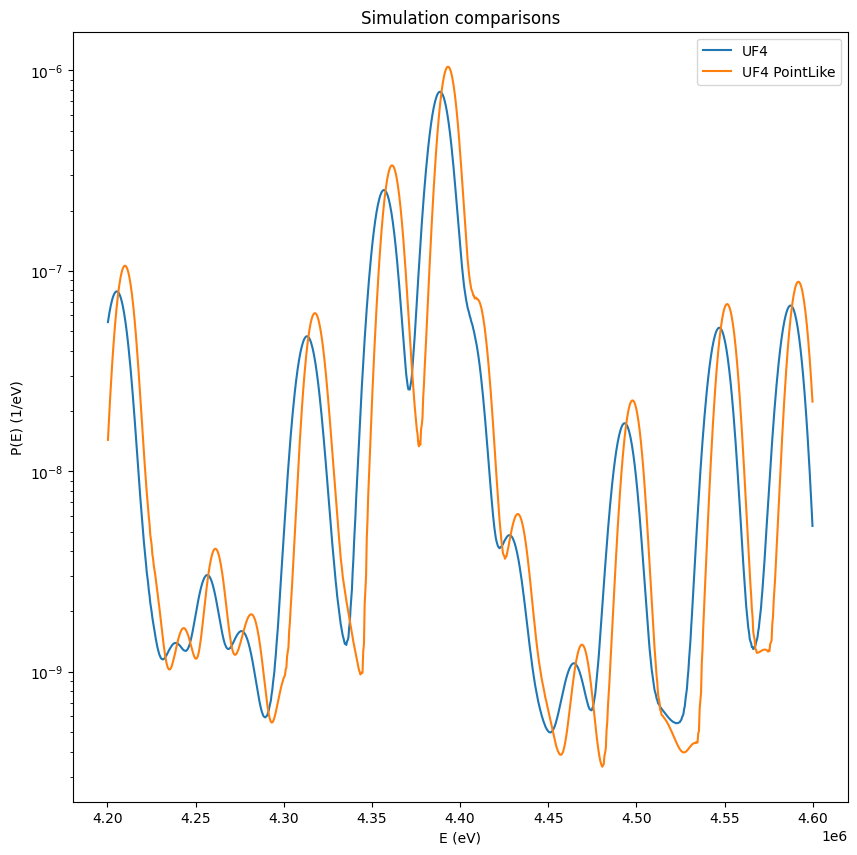

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')
plt.plot(df_p_conv['E (eV)'], df_p_conv['P(E) (1/eV)'], label='UF4 PointLike')

plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()

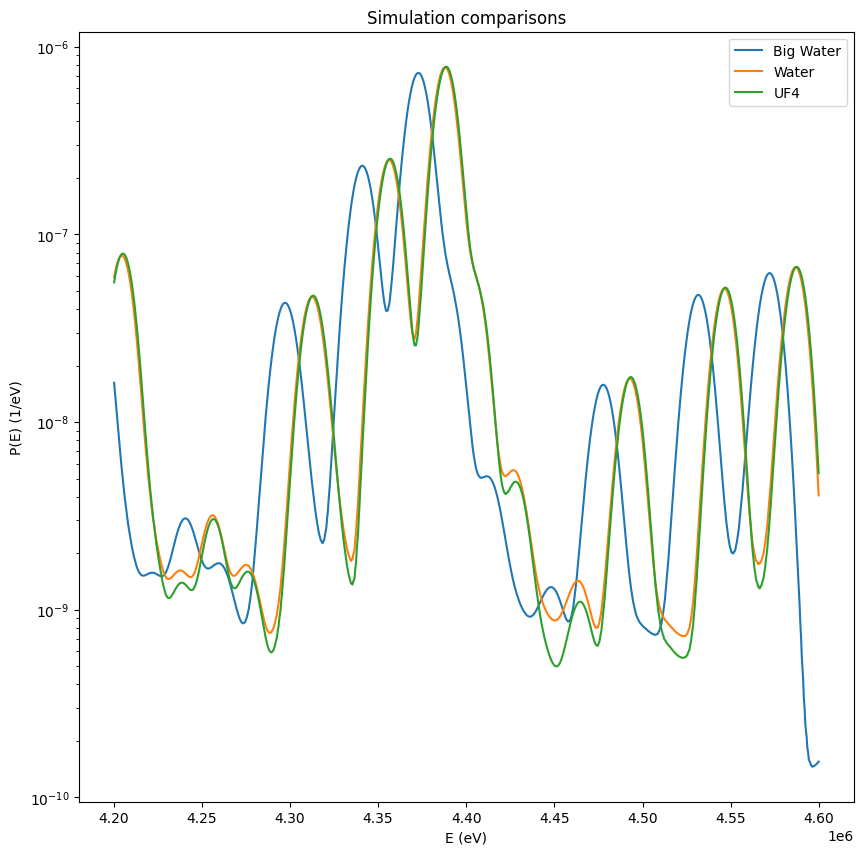

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(df_bwater['E (eV)'], df_bwater['P(E) (1/eV)'], label='Big Water')
plt.plot(df_water['E (eV)'], df_water['P(E) (1/eV)'], label='Water')
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')

plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()

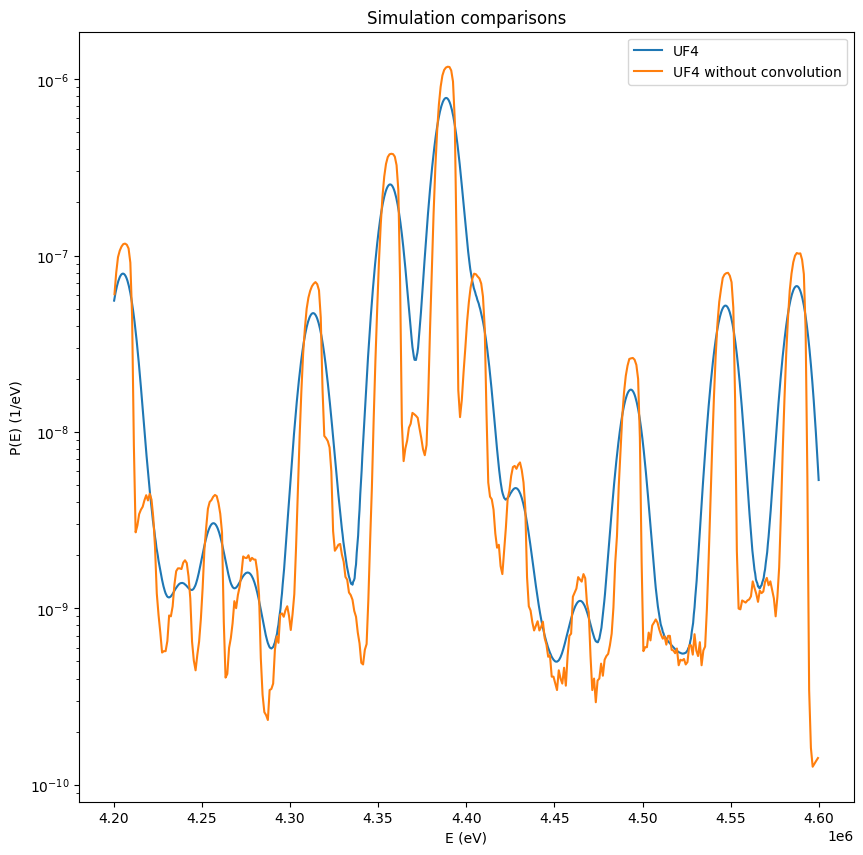

In [6]:
plt.figure(figsize=(10,10))
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')
plt.plot(df_UF4_nconv['E (eV)'], df_UF4_nconv['P(E) (1/eV)'], label= 'UF4 without convolution')

plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()

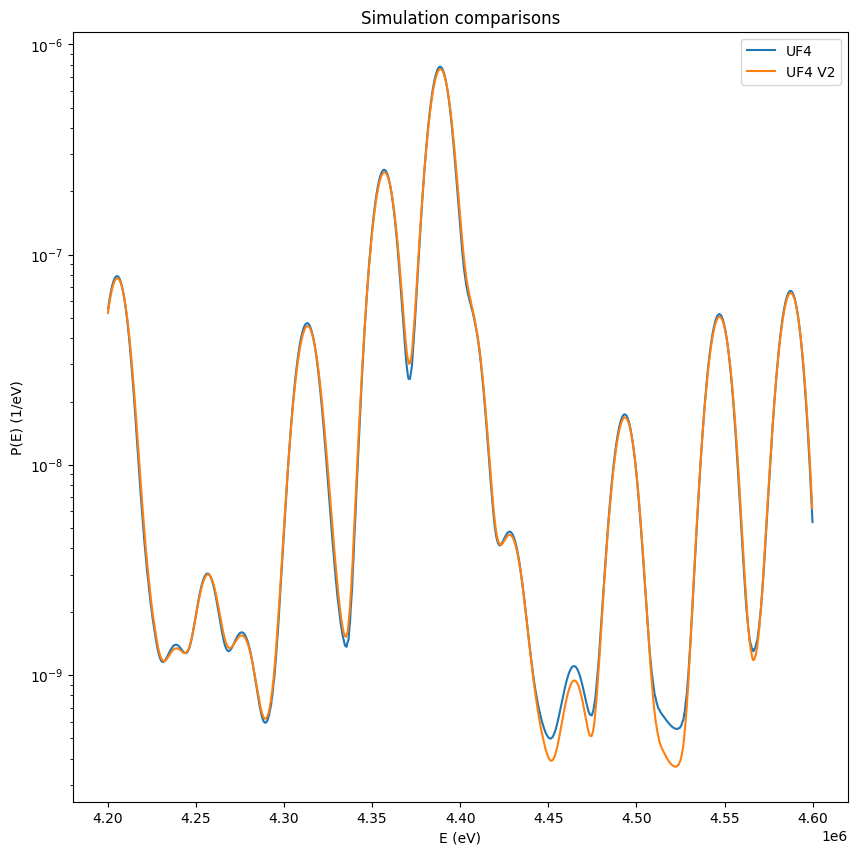

In [7]:
plt.figure(figsize=(10,10))
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')
plt.plot(df_wwater_v2['E (eV)'], df_wwater_v2['P(E) (1/eV)'], label='UF4 V2')


plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()

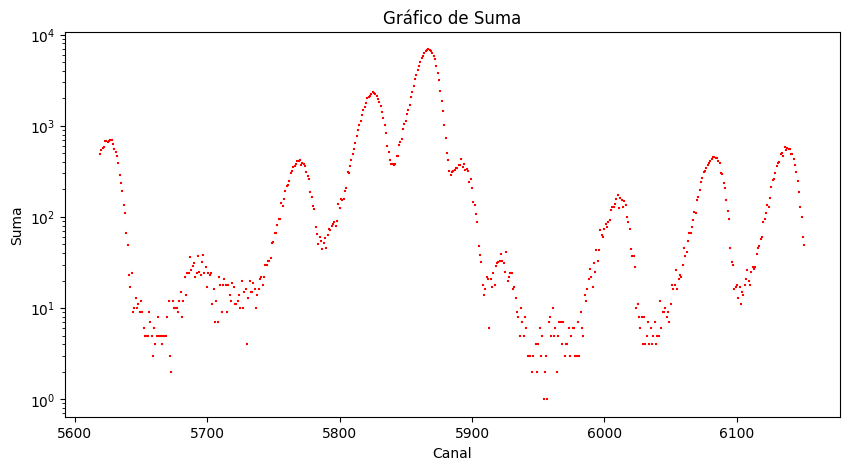

In [65]:
df_exp = pd.read_csv("Exp_U235.csv", sep=";")
df_exp = df_exp[['Suma']]

# Definir el rango deseado en el eje X
inicio = 5619
fin = 6151

# Filtrar el DataFrame para incluir solo las filas dentro del rango
df_exp = df_exp[(df_exp.index >= inicio) & (df_exp.index <= fin)]

# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.scatter(df_exp.index, df_exp['Suma'], s=4, marker= '+', color='red')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')

plt.show()

In [126]:
df_exp_transf = df_exp.reset_index(drop=True)

y0_exp = df_exp_transf['Suma'].iloc[0]
yf_exp = df_exp_transf['Suma'].iloc[-1]

y0_th = df_wwater_v2['P(E) (1/eV)'].iloc[0]
yf_th = df_wwater_v2['P(E) (1/eV)'].iloc[-1]

my = (yf_th-y0_th)/(yf_exp-y0_exp)
by = yf_th - my*yf_exp

df_exp_transf['P(E) (1/eV) Predicted'] = by + my*df_exp_transf['Suma']

x0_exp = 0
xf_exp = len(df_exp_transf) - 1

x0_th = df_wwater_v2['E (eV)'].iloc[0]
xf_th = df_wwater_v2['E (eV)'].iloc[-1]

mx = (xf_th-x0_th)/(xf_exp-x0_exp)
bx = x0_th - mx*x0_exp

fitting_bx =100
fitting_mx = 0
df_exp_transf['E (eV) Predicted'] = (bx+fitting_bx)  + (mx+fitting_mx)*df_exp_transf.index

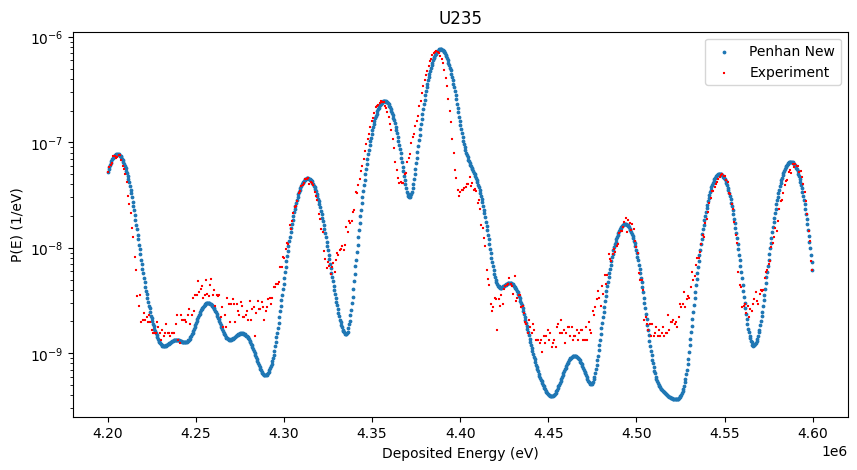

In [127]:
plt.figure(figsize=(10, 5))
plt.scatter(df_wwater_v2['E (eV)'],
            df_wwater_v2['P(E) (1/eV)'], s= 3,
            marker ='o', label='Penhan New')
plt.scatter(df_exp_transf['E (eV) Predicted'],
            df_exp_transf['P(E) (1/eV) Predicted'], s= 4, marker='+',
            color='red', label='Experiment')
plt.title('U235')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')
plt.legend()
plt.show()